In [1]:
# Numpy, Pillow, matplotlib, math, cv2, scipy libraries were used to do the following program. 

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math
import cv2

In [2]:
#I have imported 'stack.mat' file and assigned it to a variable mat.
import scipy.io
mat = scipy.io.loadmat('stack.mat')

In [3]:
#mat file
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Feb 05 14:40:11 2010',
 '__version__': '1.0',
 '__globals__': [],
 'numframes': array([[100]], dtype=uint8),
 'frame001': array([[56, 56, 57, ..., 52, 51, 51],
        [56, 56, 57, ..., 52, 51, 51],
        [57, 57, 58, ..., 53, 52, 52],
        ...,
        [52, 52, 53, ..., 58, 57, 57],
        [51, 51, 52, ..., 58, 57, 57],
        [51, 51, 52, ..., 57, 57, 56]], dtype=uint8),
 'frame002': array([[55, 55, 56, ..., 51, 50, 50],
        [55, 56, 57, ..., 51, 51, 50],
        [56, 57, 58, ..., 52, 51, 51],
        ...,
        [52, 52, 52, ..., 58, 57, 57],
        [51, 51, 52, ..., 57, 57, 56],
        [51, 51, 51, ..., 57, 56, 56]], dtype=uint8),
 'frame003': array([[55, 55, 56, ..., 51, 50, 50],
        [55, 56, 57, ..., 51, 50, 50],
        [56, 57, 58, ..., 52, 51, 51],
        ...,
        [52, 52, 52, ..., 59, 58, 57],
        [51, 51, 52, ..., 58, 57, 57],
        [51, 51, 51, ..., 58, 57, 57]], dtype=uint8)

In [4]:
#Here from the stack of images i have take 'frame008' to calculate the shape and size of the matrix (N,M).
N,M=mat['frame008'].shape
N,M

(115, 115)

In [5]:
#Dictionary was used to assign the matrix of image.
#empty dictionaries were created.
fxx_matrix={}
fyy_matrix={}
ML_matrix={}
SML_matrix={}

In [6]:
#Kernel matrix was created for Sum modified laplacian.

fxx_kernel=np.array([[0,0,0],[1,-2,1],[0,0,0]])
fxx_k=np.array([ 0,  0,  0,  1, -2,  1,  0,  0,  0])

fyy_kernel=np.array([[0,1,0],[0,-2,0],[0,1,0]])
fyy_k=np.array([ 0,  1,  0,  0, -2,  0,  0,  1,  0])

a,b=fxx_kernel.shape
x=int((a-1)/2)
x

1

# Here we have to assign q value q=[0,1,2]. q is the size of the neighourhood for the SML window.

In [7]:
#q is the size of the neighourhood for the SML window.Here we have used for different value of q ranging from 0,1,2.
q=0

# This is the code that finds out the SML matrix.

In [8]:
#Below code will help us to find ot the SML(sum modified laplacian).
#Here there total 100 frames. 
for h in range(1,101):
    #index value helps in picking up the matrix refering to that frame.
    if h<10:
        index='frame00{}'.format(h)
    elif 10<=h<100:
        index='frame0{}'.format(h)
    else:
        index='frame{}'.format(h)
    
    #Convolution was applied for fxx using x lapacian operator and modulus was taken.
    F1_matrix=np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            F=[]
            h=[]
            for i_ in range(i-1,i+2):
                for j_ in range(j-1,j+2):
                    if i_<0 or j_<0 or i_>=M or j_>=N:
                        F.append(0)
                        h.append(0)
                    else:
                        F.append(mat[index][i_,j_])
                        h.append(1)
            F=np.array(F)
            h=np.array(h)
            H=h*fxx_k
            F1_matrix[i,j]=abs(np.dot(F,H))
    fxx_matrix.update({index:F1_matrix})

     #Convolution was applied for fyy using y lapacian operator and modulus was taken.
    F2_matrix=np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            F=[]
            h=[]
            for i_ in range(i-1,i+2):
                for j_ in range(j-1,j+2):
                    if i_<0 or j_<0 or i_>=M or j_>=N:
                        F.append(0)
                        h.append(0)
                    else:
                        F.append(mat[index][i_,j_])
                        h.append(1)
            F=np.array(F)
            h=np.array(h)
            H=h*fyy_k
            F2_matrix[i,j]=abs(np.dot(F,H))
    fyy_matrix.update({index:F2_matrix})
    
    #Both the fxx_matrix and fyy_matrix was added together and assigned as ML_Matrix(ML=modified laplacian).
    F_matrix=F1_matrix+F2_matrix
    ML_matrix.update({index:F_matrix})
    
    #q is the size of the neighourhood for the SML window.
    if q==0:
        SML_matrix=ML_matrix
    else:
        F3_matrix=np.zeros((M,N))
        for i in range(M):
            for j in range(N):
                total=0
                for i_ in range(i-q,i+q):
                    for j_ in range(j-q,j+q):
                        if i_<0 or j_<0 or i_>=M or j_>=N:
                            total += 0
                        else:
                            total += ML_matrix[index][i_,j_]
                F3_matrix[i,j]=total
        #Final sum modified laplacian value.
        SML_matrix.update({index:F3_matrix})

In [9]:
#This is the modifed laplacian matrix.
ML_matrix

{'frame001': array([[112.,  57.,  58., ...,  52.,  52., 102.],
        [ 57.,   2.,   2., ...,   2.,   2.,  52.],
        [ 58.,   2.,   2., ...,   0.,   1.,  52.],
        ...,
        [ 52.,   1.,   1., ...,   2.,   2.,  58.],
        [ 52.,   2.,   1., ...,   1.,   1.,  58.],
        [102.,  52.,  53., ...,  58.,  58., 110.]]),
 'frame002': array([[110.,  55.,  56., ...,  52.,  50., 100.],
        [ 55.,   0.,   0., ...,   3.,   2.,  50.],
        [ 56.,   0.,   0., ...,   2.,   2.,  51.],
        ...,
        [ 52.,   0.,   2., ...,   1.,   2.,  57.],
        [ 52.,   2.,   2., ...,   3.,   2.,  56.],
        [102.,  51.,  51., ...,  57.,  56., 112.]]),
 'frame003': array([[110.,  55.,  56., ...,  52.,  51., 100.],
        [ 55.,   0.,   0., ...,   2.,   2.,  51.],
        [ 56.,   0.,   1., ...,   1.,   1.,  51.],
        ...,
        [ 52.,   0.,   3., ...,   0.,   0.,  57.],
        [ 52.,   2.,   2., ...,   1.,   2.,  57.],
        [102.,  51.,  51., ...,  58.,  58., 114.]]),
 

In [10]:
#This is the sum modified laplacian matrix.
SML_matrix

{'frame001': array([[112.,  57.,  58., ...,  52.,  52., 102.],
        [ 57.,   2.,   2., ...,   2.,   2.,  52.],
        [ 58.,   2.,   2., ...,   0.,   1.,  52.],
        ...,
        [ 52.,   1.,   1., ...,   2.,   2.,  58.],
        [ 52.,   2.,   1., ...,   1.,   1.,  58.],
        [102.,  52.,  53., ...,  58.,  58., 110.]]),
 'frame002': array([[110.,  55.,  56., ...,  52.,  50., 100.],
        [ 55.,   0.,   0., ...,   3.,   2.,  50.],
        [ 56.,   0.,   0., ...,   2.,   2.,  51.],
        ...,
        [ 52.,   0.,   2., ...,   1.,   2.,  57.],
        [ 52.,   2.,   2., ...,   3.,   2.,  56.],
        [102.,  51.,  51., ...,  57.,  56., 112.]]),
 'frame003': array([[110.,  55.,  56., ...,  52.,  51., 100.],
        [ 55.,   0.,   0., ...,   2.,   2.,  51.],
        [ 56.,   0.,   1., ...,   1.,   1.,  51.],
        ...,
        [ 52.,   0.,   3., ...,   0.,   0.,  57.],
        [ 52.,   2.,   2., ...,   1.,   2.,  57.],
        [102.,  51.,  51., ...,  58.,  58., 114.]]),
 

# This code give us the d_bar value at each pixel by using gauss interpolation method.

In [11]:
# code for calculating d_bar using gaussian interpolation method.
d_matrix=np.zeros((N,M))
Focused_matrix=np.zeros((N,M))

#delta_d is given below.
delta_d=50.5
FF=[]

for i in range(M):
    for j in range(N):
        Fm_value=[]
        for h in range(1,101):
            if h<10:
                index='frame00{}'.format(h)
            elif 10<=h<100:
                index='frame0{}'.format(h)
            else:
                index='frame{}'.format(h)
        
            Fm_value.append(SML_matrix[index][i,j])
        Fm=max(Fm_value)     
        max_index=Fm_value.index(Fm)
        dm=max_index*delta_d
        
        #d_matrix gives us the d_bar value for each pixel.
        
        if max_index==0:
            d_matrix[i,j]=dm

    
        elif max_index==(len(Fm_value)-1):
            d_matrix[i,j]=dm
          
        else:
            Fm1=Fm_value[max_index+1]
            dm1=(max_index+1)*delta_d
            Fm_1=Fm_value[max_index-1]
            dm_1=(max_index-1)*delta_d
            
            
            d_bar1=((math.log(Fm)-math.log(Fm_1))*(dm1**2-dm**2)-(math.log(Fm)-math.log(Fm1))*(dm_1**2-dm**2))
            d_bar2=2*delta_d*(math.log(Fm)*2-math.log(Fm1)-math.log(Fm_1))
            d_bar=d_bar1/d_bar2
        
            d_matrix[i,j]=d_bar
    

# This code will give the 3D shape of the object using d_matrix value

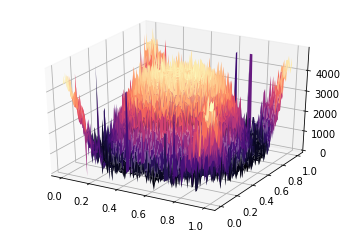

In [12]:
#3D Object obtained using below code using d_matrix value.

from mpl_toolkits.mplot3d import Axes3D

#x_axis and y_axis is linearly spaced from 0 to N in steps of 1.
x_axis = np.linspace(0, 1, N)
y_axis = np.linspace(0, 1, M)

#meshgrid was created.
xls, yls = np.meshgrid(x_axis, y_axis)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#This code creates the 3d plot using ax.plot_surface.
d_matrix3d=ax.plot_surface(xls,yls,d_matrix, cmap='magma')
plt.show()

#This is used to set colorbar.
cbar=fig.colorbar(d_matrix3d,shrink=0.5, aspect=5)
cbar.set_ticks([0, 1000, 2000, 3000, 4000, 5000])
cbar.set_ticklabels([0, 1000, 2000, 3000, 4000, 5000])

#This is used to save figure
fig.tight_layout()
fig.savefig('d_bar_value_q_zero.png')